<a href="https://colab.research.google.com/github/Ashik9576/Carduovascular-Risk-Prediction/blob/main/CardiovascularAshik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# **Importing Libraries**

In [3]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading Dataset and Analysing**

In [5]:
#loading dataset
df = pd.read_csv("/content/drive/MyDrive/Cardiovascular Risk Prediction- Ashik Kumar/data_cardiovascular_risk.csv")

In [6]:
#analyzing first five rows
df.head(15)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [7]:
#analysing last five rows
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [8]:
df.shape

(3390, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [10]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# **Missing/NULL Values Treatment**

In [11]:
#checking for null values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

seven columns contains null values

In [12]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [13]:
# Before making changes in the Data we have to amke a copy of it.
df_copy=df.copy()

In [14]:
#filling null values with 0
df_copy=df_copy.fillna(0)

In [15]:
#checking for null values
df_copy.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:

df_copy['sex'].replace({'M':1, 'F':0}, inplace=True)

In [17]:
df_copy['is_smoking'].replace({'YES':1, 'NO':0}, inplace=True)

# **Explanatory Data Analysis**

**Age**

In [18]:
df_copy['age'].value_counts()

40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
51    114
53    114
47    108
54    107
49    104
57     97
60     95
58     95
59     93
63     93
56     92
61     87
62     80
36     75
64     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64

Text(0, 0.5, 'Counts')

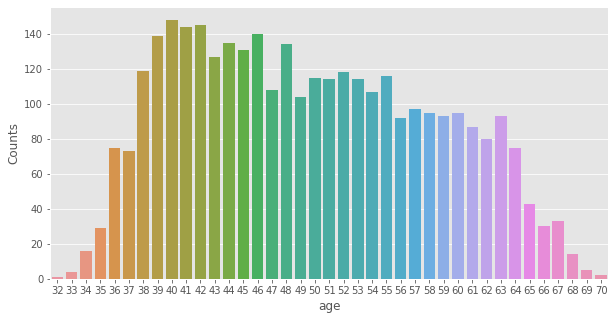

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
age=pd.DataFrame(df.groupby(['age'])['id'].count())
sns.barplot(x=age.index,y=age['id'])
plt.ylabel('Counts')

the age present in the dataset is ranging from 32 to 70.

**Education**

In [20]:
df_copy['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
0.0      87
Name: education, dtype: int64

Text(0.5, 1.0, 'Education Proposanate')

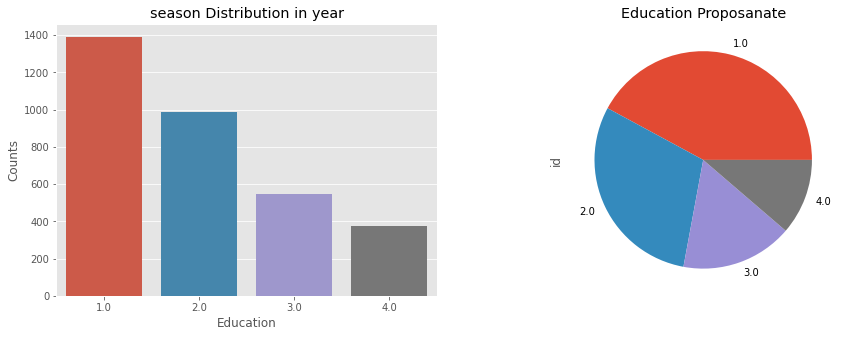

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education=pd.DataFrame(df.groupby(['education'])['id'].count())
sns.barplot(x=Education.index,y=Education['id'])
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('season Distribution in year')

ax2=plt.subplot(1,2,2)
df.groupby(['education'])['id'].count().plot(kind='pie')
plt.title('Education Proposanate')

In [22]:
df_copy.drop(['id'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c3d5db710>,
      dtype=object)

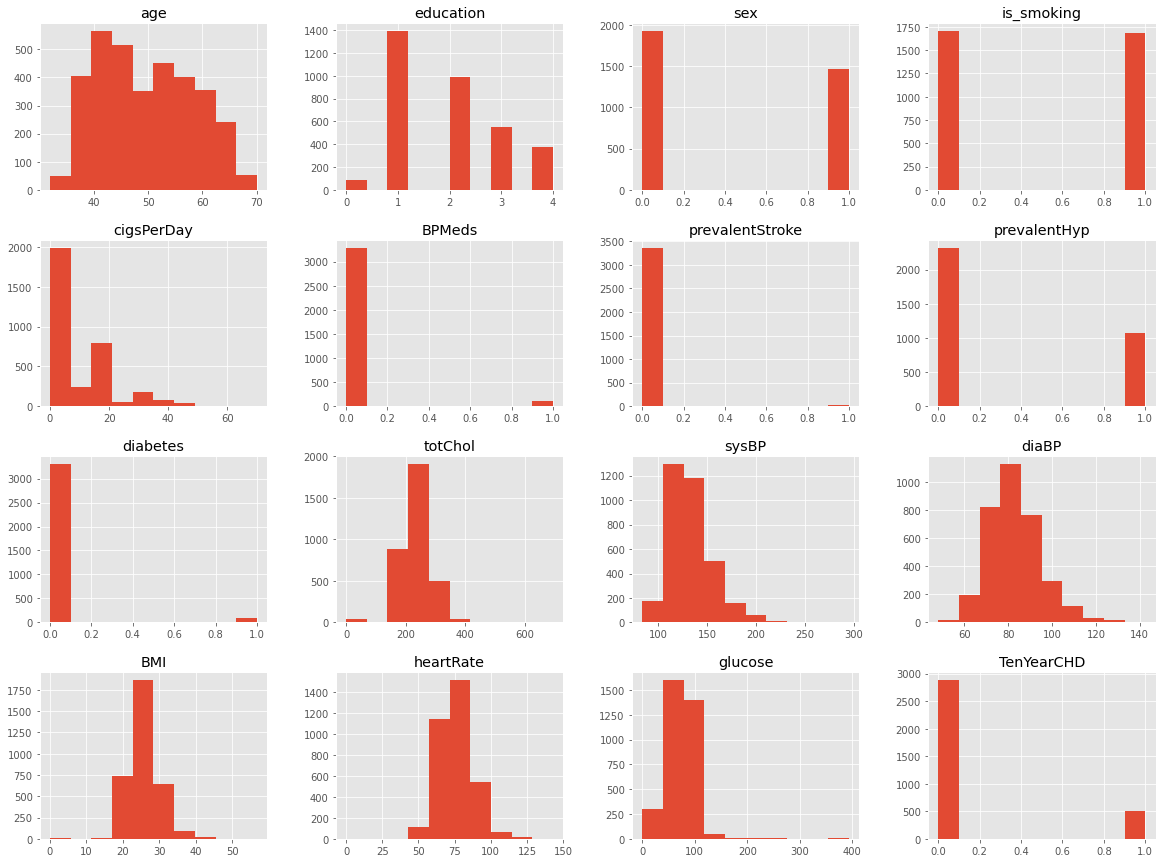

In [23]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_copy.hist(ax = ax)

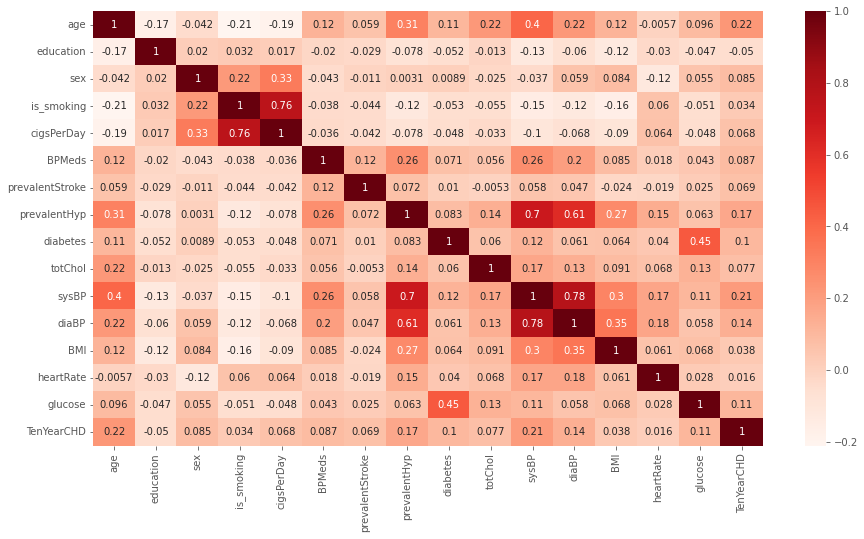

In [24]:
plt.figure(figsize=(15,8))
correlation = df_copy.corr()
sns.heatmap(correlation, annot=True, cmap='Reds')

# **Model Building**

In [25]:
df_copy.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [26]:
# Data for all the independent variables
X = df_copy.drop(labels='TenYearCHD',axis=1)

# Data for the dependent variable
y = df_copy['TenYearCHD']

In [27]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state =101, stratify=y) 
print(X_train.shape)
print(X_test.shape)

(2542, 15)
(848, 15)


# **Decision tree**

In [28]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.849331
1    0.150669
Name: TenYearCHD, dtype: float64

In [29]:
# distribution in validation set
y_test.value_counts(normalize=True)

0    0.849057
1    0.150943
Name: TenYearCHD, dtype: float64

In [30]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [31]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [32]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [33]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [34]:
#checking the validation score
dt_model.score(X_test, y_test)

0.7818396226415094

In [35]:
#predictions on validation set
dt_model.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [36]:
dt_model.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [37]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [38]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_new)

0.7818396226415094

In [41]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [42]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':validation_accuracy})
frame.head(10)

,max_depth,train_acc,test_acc
0,1,0.849331,0.849057
1,2,0.853659,0.845519
2,3,0.855232,0.846698
3,4,0.857199,0.841981
4,5,0.866247,0.841981
5,6,0.877262,0.839623
6,7,0.886310,0.836085
7,8,0.895751,0.833726
8,9,0.905193,0.830189


No handles with labels found to put in legend.


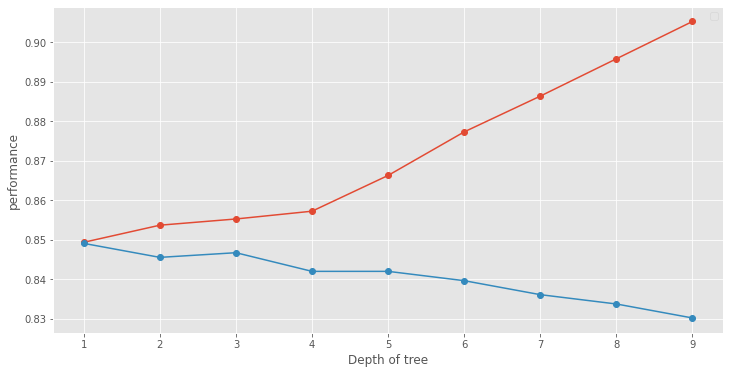

In [43]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(loc='higher left')

In [44]:
dt_model = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=25, random_state=10)

In [45]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=25, random_state=10)

In [46]:
#Training score
dt_model.score(X_train, y_train)

0.8493312352478364

In [47]:
#Validation score
dt_model.score(X_test, y_test)

0.8490566037735849

In [48]:
from sklearn import tree

In [49]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=5,filled=True)

In [50]:
!dot -Tpng tree.dot -o tree.png

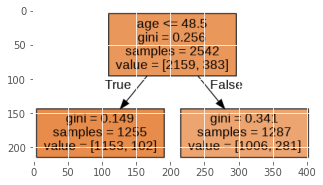

In [51]:
image = plt.imread('tree.png')
plt.figure(figsize=(5,5))
plt.imshow(image)

# **KNN**

In [52]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

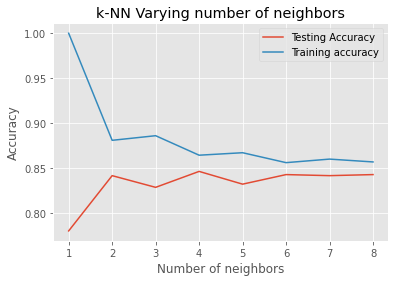

In [53]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [55]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [56]:

knn.score(X_test,y_test)

0.8431603773584906

In [57]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [58]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [59]:
confusion_matrix(y_test,y_pred)

array([[713,   7],
       [126,   2]])

In [60]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

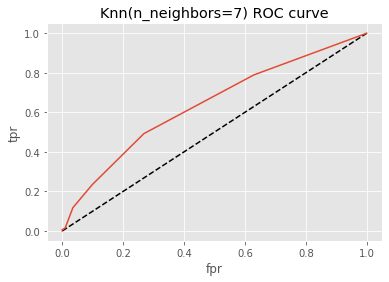

In [62]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [63]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6376085069444444

In [64]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [65]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [66]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [67]:
knn_cv.best_score_

0.851622418879056

In [68]:
knn_cv.best_params_

{'n_neighbors': 27}

# **RANDOM FOREST**

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
GSclassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [70]:
bestvalues=GSclassifier.best_params_
GSclassifier.best_params_


{'max_depth': 7, 'n_estimators': 120}

In [71]:
classifier = RandomForestClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators']) # For GBM, use GradientBoostingClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=120)

In [72]:
y_train_preds_rf =  classifier.predict(X_train)
y_test_preds_rf= classifier.predict(X_test)

In [73]:
# Obtain accuracy on train set
accuracy_score(y_train,y_train_preds_rf)

0.8709677419354839

In [74]:
# Obtain accuracy on test set
accuracy_score(y_test,y_test_preds_rf)

0.8502358490566038

In [75]:
y_rf_predict_pro=classifier.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_predict_pro)

In [76]:
roc_auc_score(y_test,y_rf_predict_pro)

0.7195095486111112

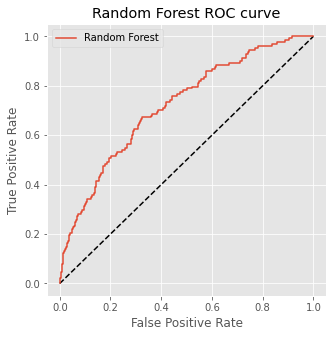

In [77]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend()
plt.show()

In [78]:
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

# **Conclusion**

*The following columns lie in the range:

totChol: 150 to 300 , sysBP: 100 to 150, diaBP: 60 to 100 ,BMI: 20 to 30, heartRate: 50 to 100 glucose: 50 to 150 *Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers

* No currentSmokers observed below the age of 32
* Maximum age for a currentSmokers is 70
* Males have shown a slightly higher risk of coronary heart disease TenYearCHD.
* Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
* No currentSmokers observed below the age of 32
* Low cigsPerDay comes with lower risk of CHD.
* Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
* Minor relation of higher risk of TenYearCHD found with higher sysBP AND higher diaBP
* Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.
* Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.
Again, age, total cholesterol level, diastolic blood pressure, BMI, and glucose level are the main culprits leading to heart diseases,especially CHD.
These models show that our analysis is highly accurate. Since Light GBM gives the best score in testing(95%), we can trust on this model,
[ ]
